# Experiments on hyperparameters

In [ ]:
import sys
import os

# Add the absolute path to 'src' folder
sys.path.append(os.path.abspath("src"))

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from typing import List
from layer import Layer
from linear import Linear
from activations import ActivationReLU, ActivationSigmoid
from sequential import Sequential
from utils import mean_squared_error, InformantStrategy
from data import load_data
from pso import ParticleSwarmOptimisation, AccelerationCoefficients

/home/arne/Concrete_ANN_PSO/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Final particle fitness: 0.0162097097020169
Final particle position sample: [ 0.08295593  0.07009263  0.0638796  -0.14087288  0.07612497]


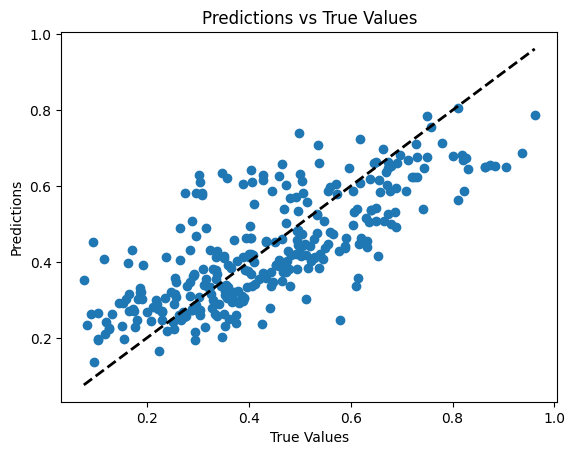

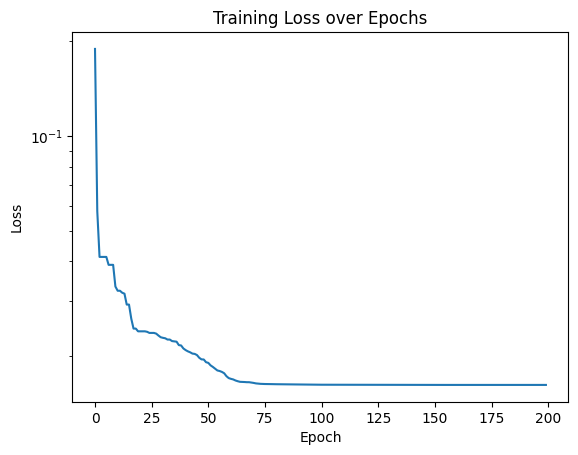

Test Accuracy: 77.65%
Train Accuracy: 76.54%
Final particle fitness: 0.016225689877298218
Final particle position sample: [ 0.00886403 -0.02134705 -0.00082671  0.18088703  0.04954906]


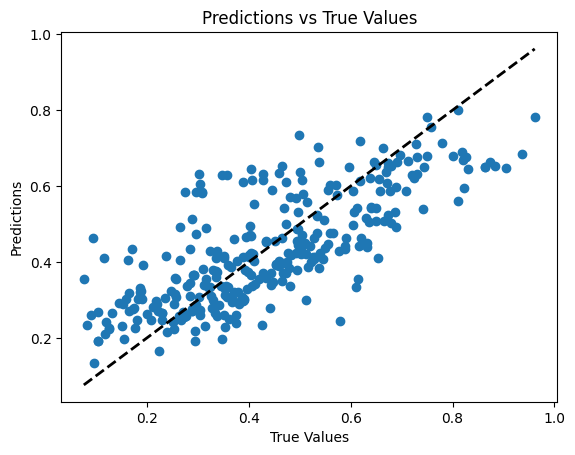

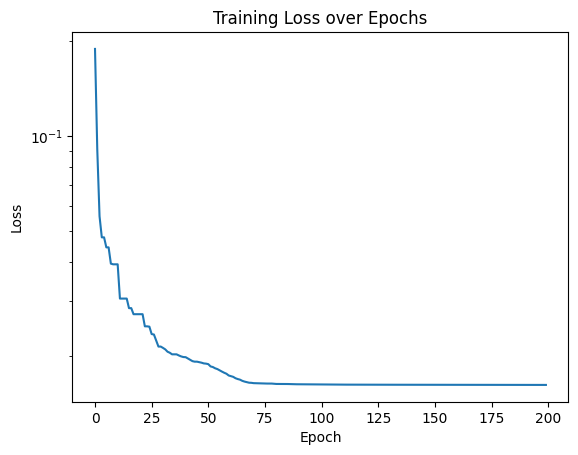

Test Accuracy: 77.57%
Train Accuracy: 76.52%
Final particle fitness: 0.00972605108199894
Final particle position sample: [ 0.01129534  0.01730646  0.01559623 -0.03542967 -0.02882104]


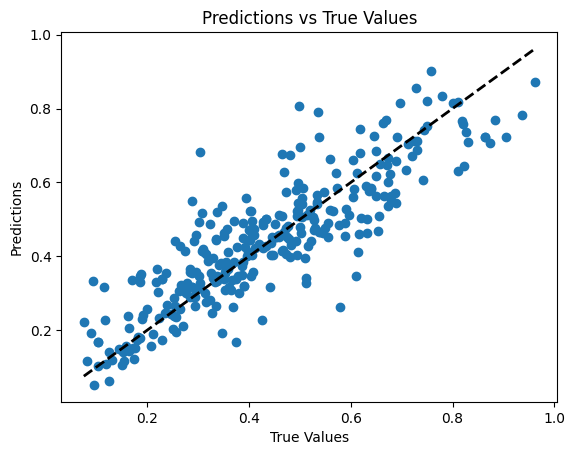

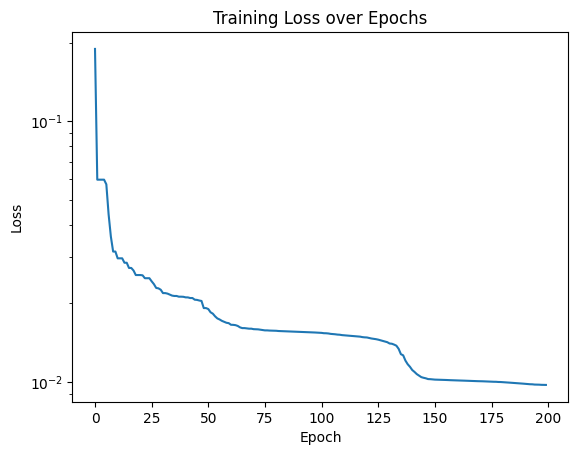

Test Accuracy: 83.52%
Train Accuracy: 82.67%
Final particle fitness: 0.01622035889804226
Final particle position sample: [ 0.07147184  0.0107135  -0.02792921 -0.05358277 -0.00666673]


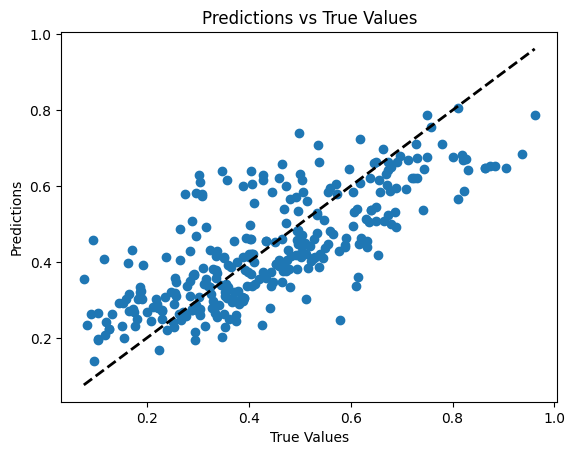

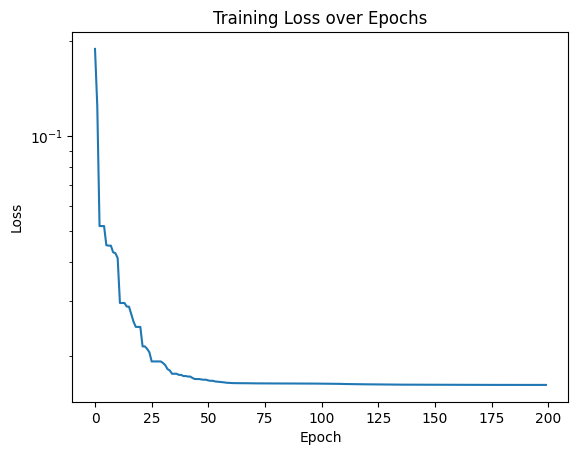

Test Accuracy: 77.62%
Train Accuracy: 76.51%
Final particle fitness: 0.016225369407922456
Final particle position sample: [ 0.05111878  0.0340896   0.01152402 -0.09840672  0.04534999]


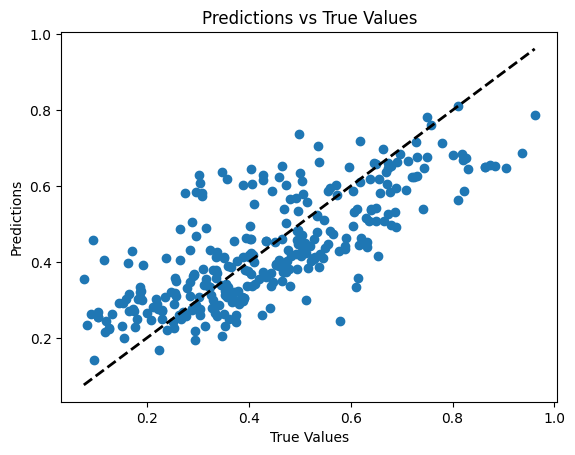

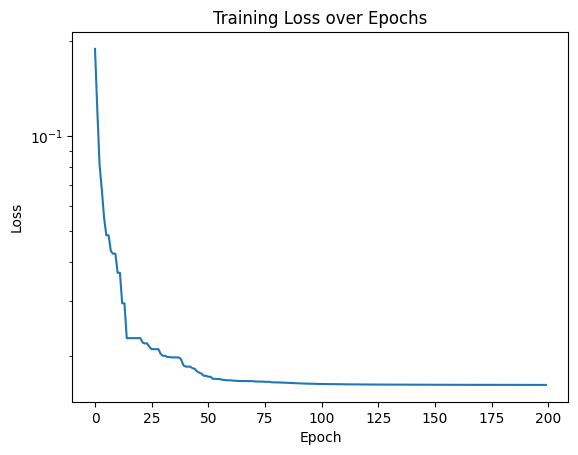

Test Accuracy: 77.62%
Train Accuracy: 76.48%
Final particle fitness: 0.016230486061263778
Final particle position sample: [ 0.00770721  0.06972072 -0.06794824  0.05431435  0.01529528]


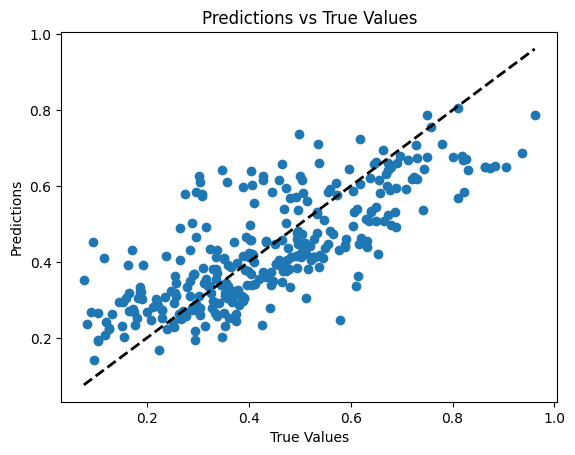

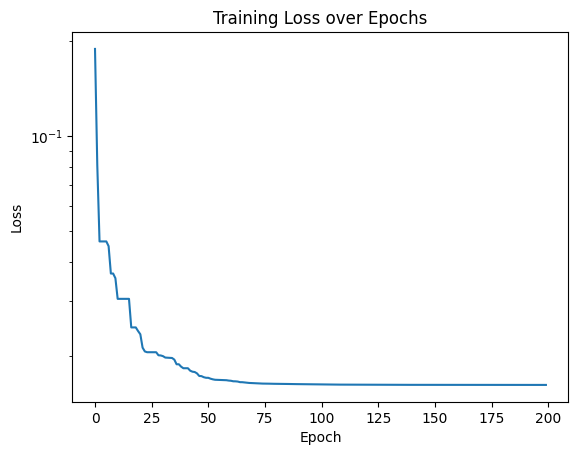

Test Accuracy: 77.65%
Train Accuracy: 76.50%
Final particle fitness: 0.01621217187093799
Final particle position sample: [ 0.07345786  0.06184462  0.05600591 -0.12616639  0.07085821]


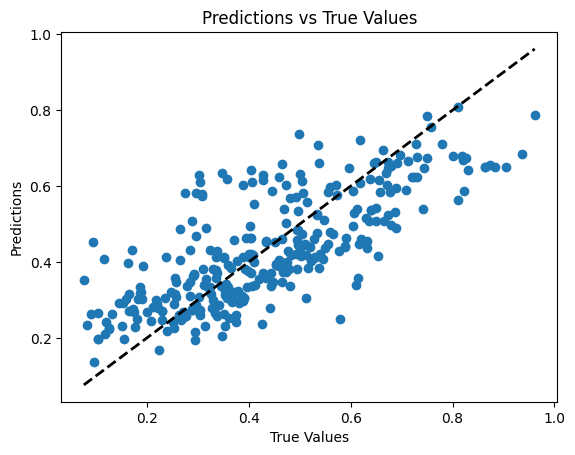

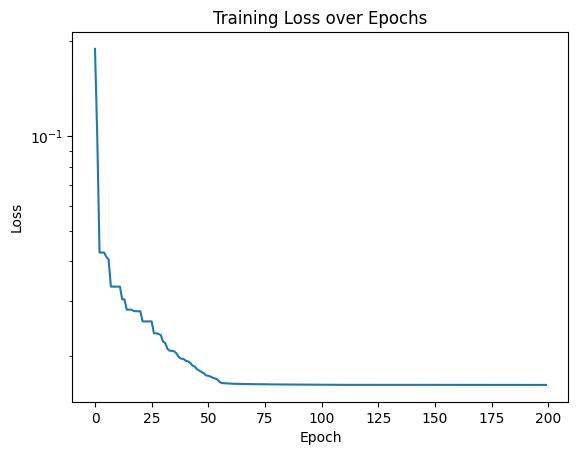

Test Accuracy: 77.66%
Train Accuracy: 76.53%
Final particle fitness: 0.016203857695150054
Final particle position sample: [-0.10738715  0.02711817 -0.0926738  -0.03554784  0.02711886]


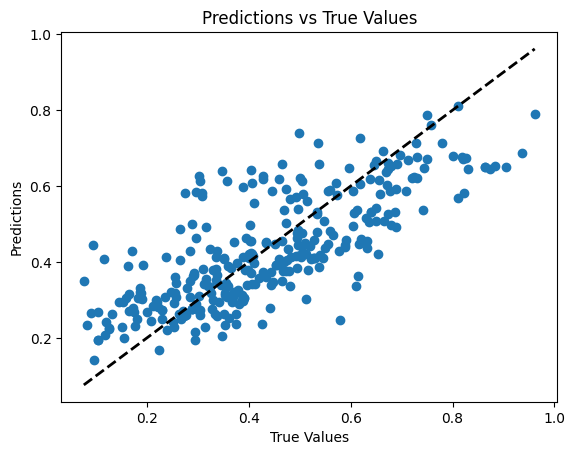

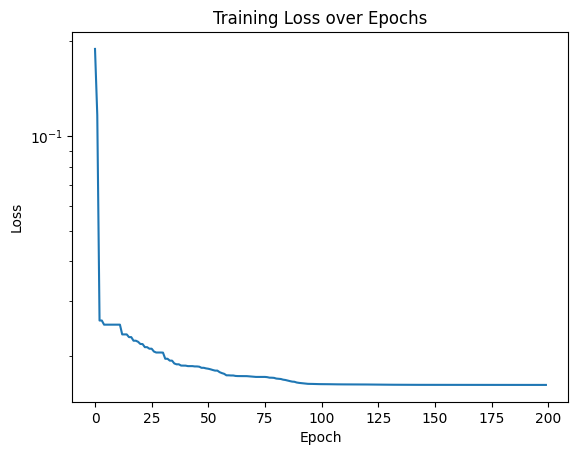

Test Accuracy: 77.75%
Train Accuracy: 76.54%
Final particle fitness: 0.015985897805747107
Final particle position sample: [ 0.04938185  0.04523663  0.03955017 -0.08955583  0.00226879]


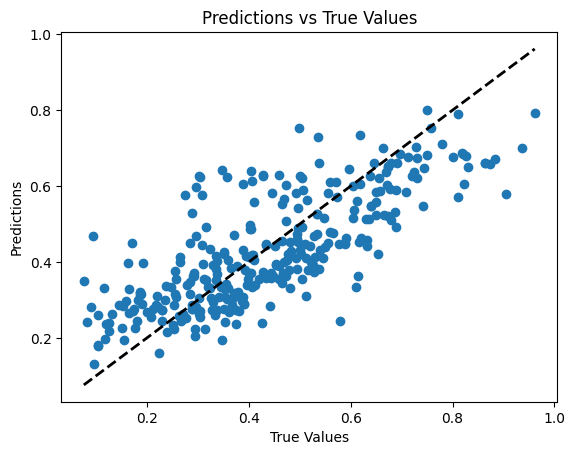

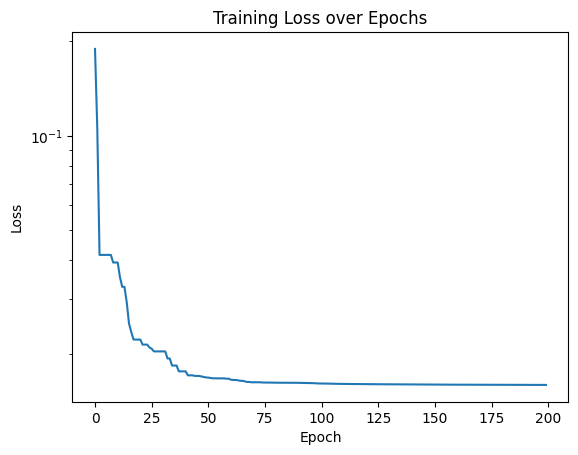

Test Accuracy: 77.86%
Train Accuracy: 76.67%
Final particle fitness: 0.01621352943776709
Final particle position sample: [ 0.0746473   0.00404517  0.12106554 -0.09259609 -0.09446155]


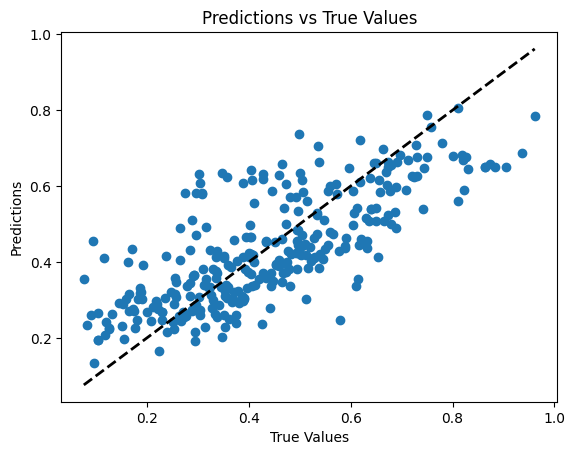

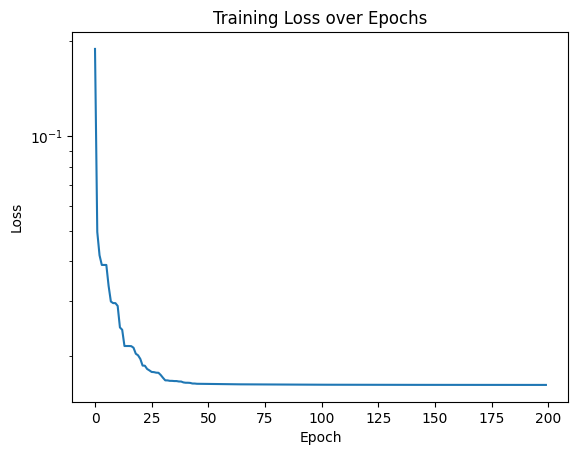

Test Accuracy: 77.60%
Train Accuracy: 76.54%
Final particle fitness: 0.01625701940270529
Final particle position sample: [ 0.0641122   0.05486422  0.05170643 -0.1158694  -0.01664308]


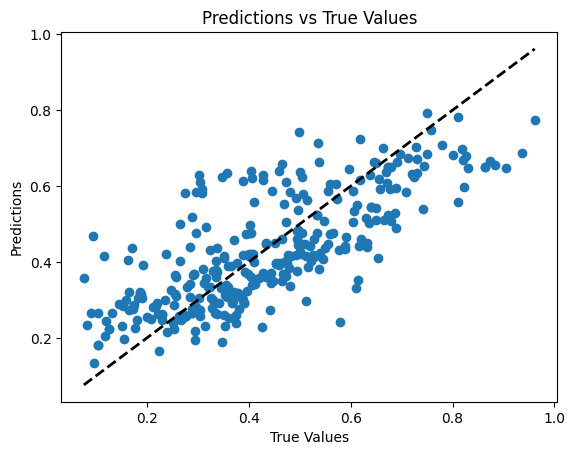

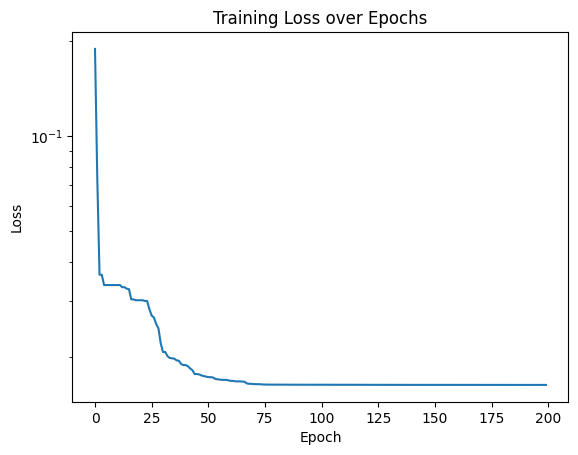

Test Accuracy: 77.43%
Train Accuracy: 76.56%
Final particle fitness: 0.016207809028385516
Final particle position sample: [ 0.06730275  0.05677088  0.05170744 -0.11166257  0.07042268]


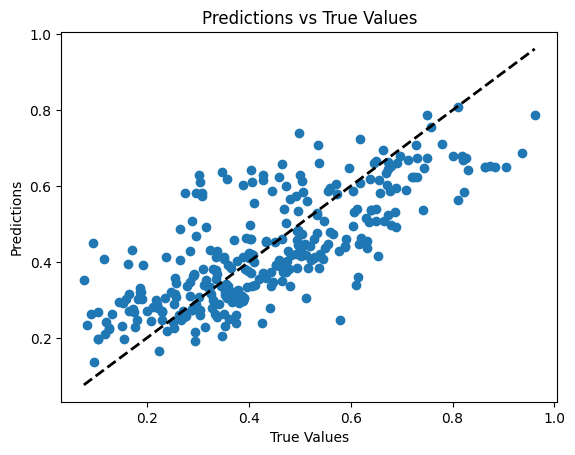

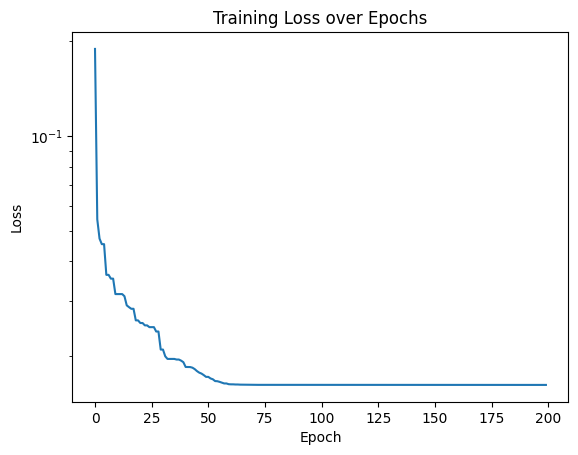

Test Accuracy: 77.65%
Train Accuracy: 76.54%
Final particle fitness: 0.016214460721103607
Final particle position sample: [-0.08178194 -0.01631742  0.01077927 -0.01670136  0.00219238]


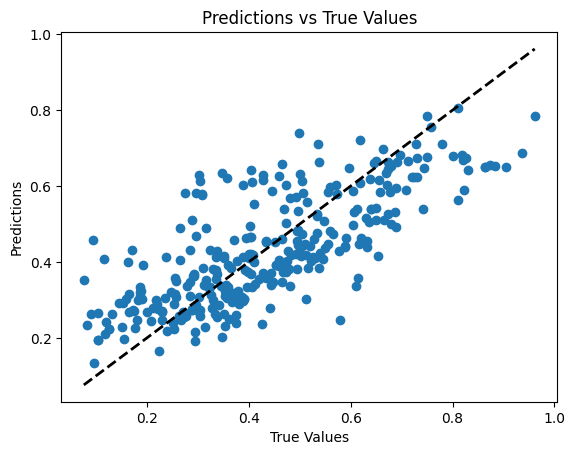

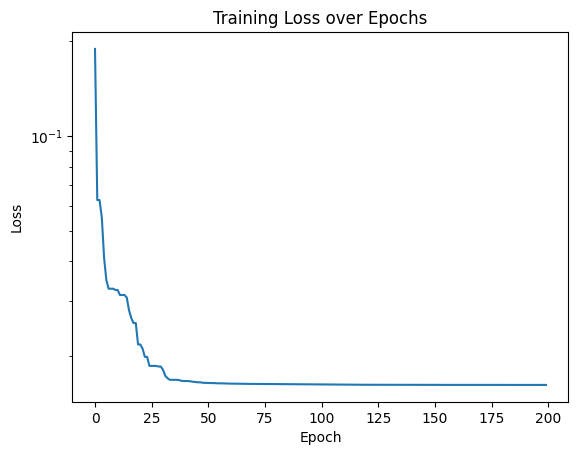

Test Accuracy: 77.62%
Train Accuracy: 76.53%
Final particle fitness: 0.016213163502505137
Final particle position sample: [ 0.08403509  0.07139439  0.06588467 -0.14318016  0.04808257]


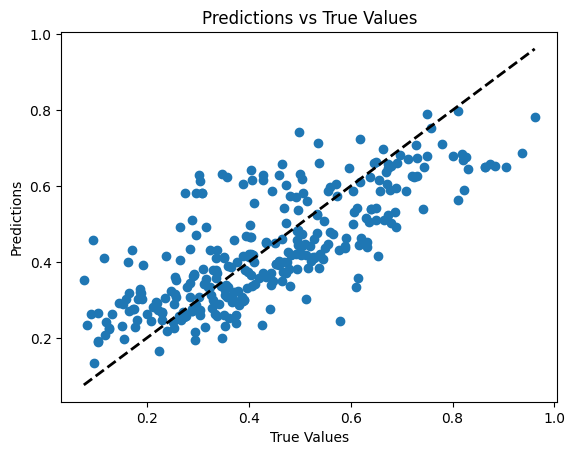

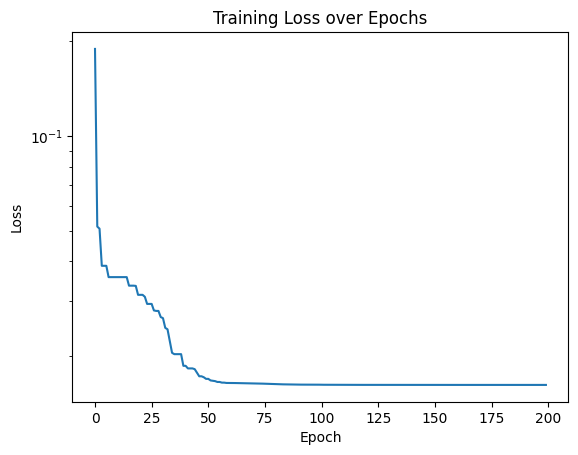

Test Accuracy: 77.59%
Train Accuracy: 76.55%
Final particle fitness: 0.016109447518581645
Final particle position sample: [-0.04362287  0.15797607  0.00175346 -0.01851062  0.04973628]


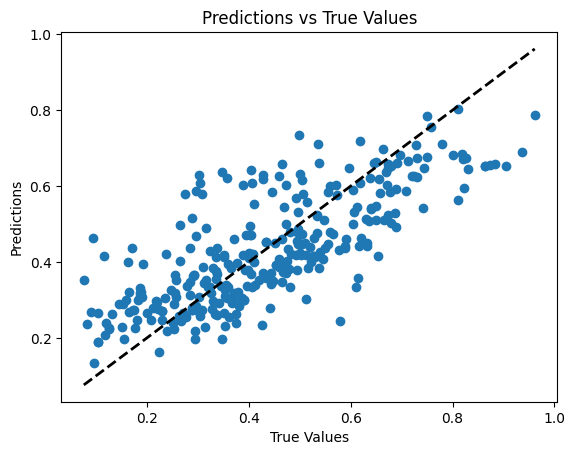

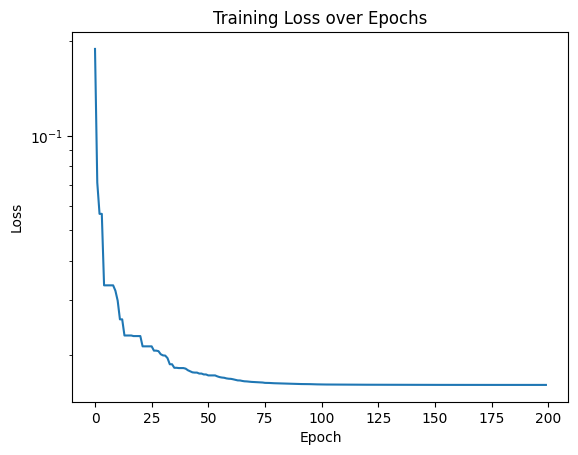

Test Accuracy: 77.83%
Train Accuracy: 76.59%
Final particle fitness: 0.016210068714338378
Final particle position sample: [ 0.08217899  0.06936407  0.06331866 -0.13842321  0.08181342]


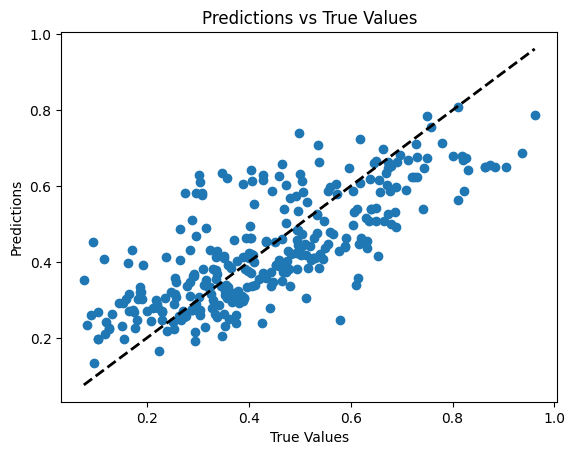

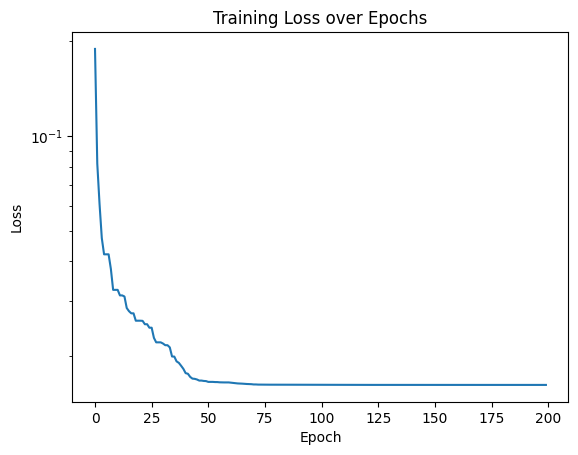

Test Accuracy: 77.66%
Train Accuracy: 76.54%
Final particle fitness: 0.016210080073683242
Final particle position sample: [ 0.07476872  0.06295678  0.05775921 -0.1249633   0.05915298]


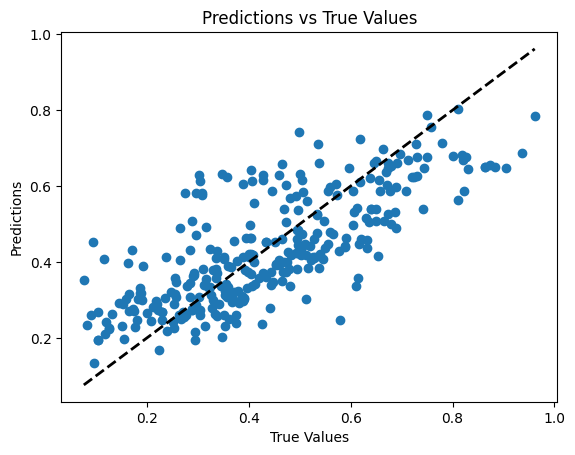

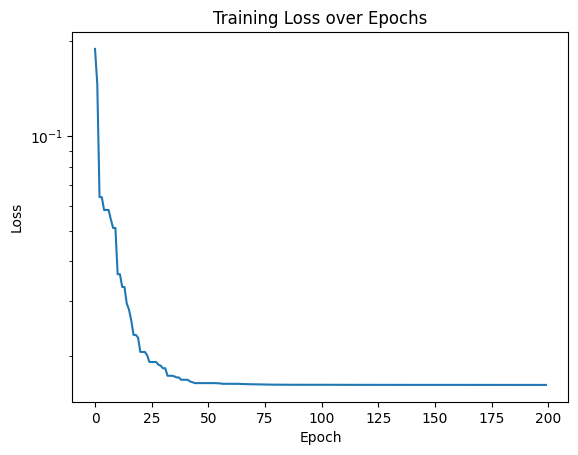

Test Accuracy: 77.66%
Train Accuracy: 76.56%
Final particle fitness: 0.016243363898041683
Final particle position sample: [ 0.08448078  0.07180412  0.0672107  -0.15477853 -0.00182338]


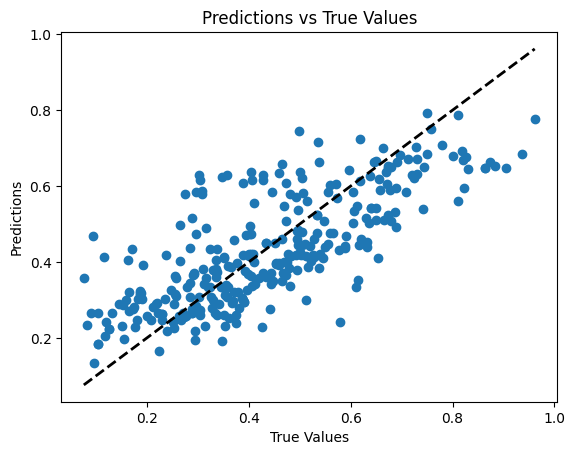

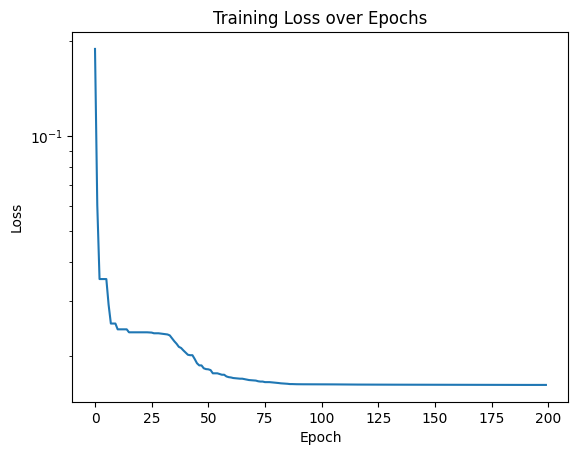

Test Accuracy: 77.48%
Train Accuracy: 76.55%
Final particle fitness: 0.016234760531440427
Final particle position sample: [ 0.09277651  0.07919393  0.07418618 -0.1622405   0.00512441]


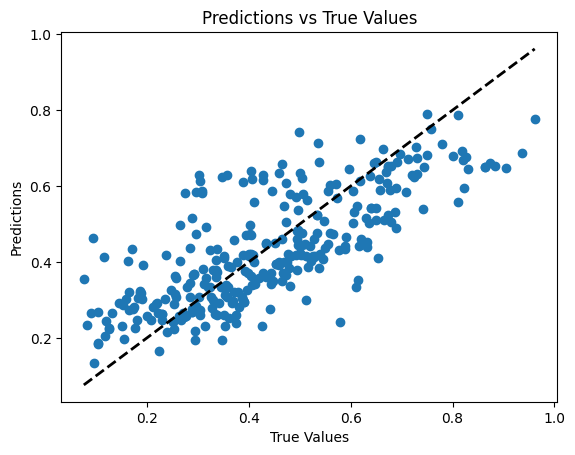

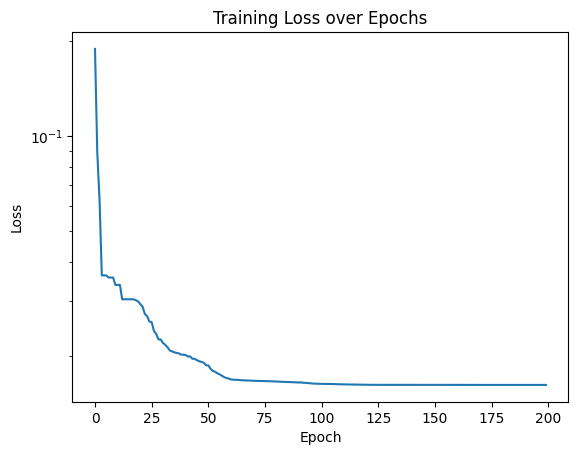

Test Accuracy: 77.51%
Train Accuracy: 76.56%
Final particle fitness: 0.01621317727799686
Final particle position sample: [-0.06405485 -0.0498492  -0.04329679  0.04476761 -0.08790179]


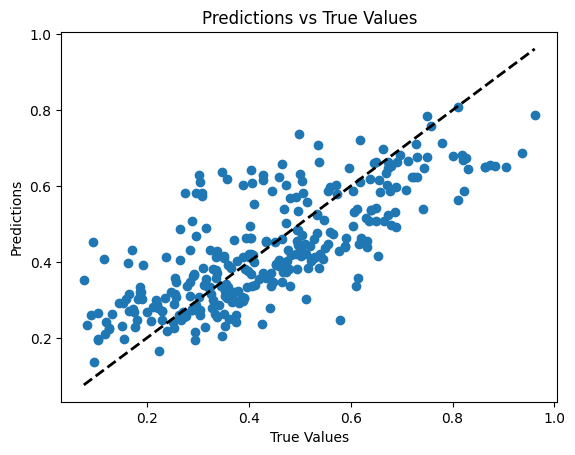

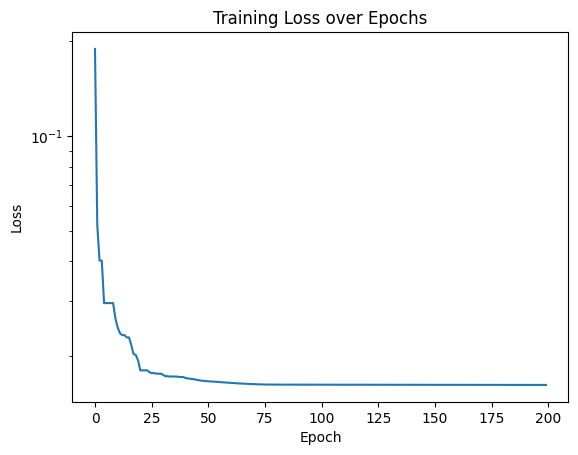

Test Accuracy: 77.65%
Train Accuracy: 76.52%

===== Summary over 20 runs =====
Average loss: 0.0159
Average train accuracy: 76.85%
Average test accuracy:  77.93%
Train accuracy std: 1.34
Test accuracy std:  1.29


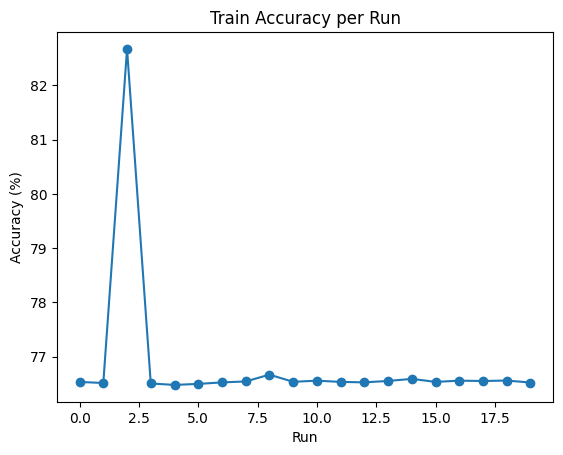

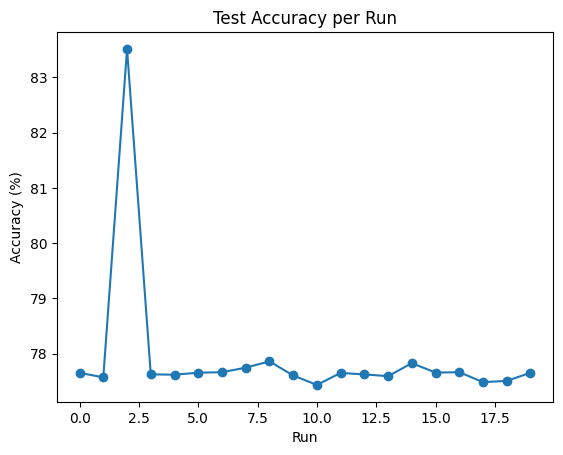

In [ ]:
(train_features, train_targets), (test_features, test_targets) = load_data(
        "./data/concrete_data.csv"
    )

from datetime import datetime
import os

# Timestamp for the entire experiment
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Main output directory
main_dir = f"./results/topology/{timestamp}_4_2_20_iter_200_epoch"
os.makedirs(main_dir, exist_ok=True)

all_final_train_accuracies = []
all_final_test_accuracies = []
all_final_losses = []

iter = 20

for run_id in range(1, iter + 1):

    mlp = Sequential(
        Linear(size_input=train_features.shape[1], size_hidden=4),
        ActivationReLU(),
        Linear(size_input=4, size_hidden=2),
        ActivationReLU(),
        Linear(size_input=2, size_hidden=1),
        )

    swarm_size = 45
    epochs = 200
    accel_coeff = AccelerationCoefficients(
        inertia_weight=0.708,
        cognitive_weight=1.898,
        social_weight=0.351,
        global_best_weight=0.684,
        jump_size=0.851,
        max_velocity=0.9,
        max_position=3.87,
    )
    num_informants = 4
    particle_initial_position_scale = (0.0001, 0.05)
    loss_function = mean_squared_error
    informants_strategy = InformantStrategy.KNEAREST

    pso = ParticleSwarmOptimisation(
        X=train_features.T,
        Y=train_targets,
        swarm_size=swarm_size,
        accel_coeff=accel_coeff,
        num_informants=num_informants,
        informants_strategy=informants_strategy,
        loss_function=loss_function,
        particle_initial_position_scale=particle_initial_position_scale,
        model=mlp,
    )

    (final_position, final_score, losses) = pso.train(epochs)
    print(f"Final particle fitness: {final_score}")
    print(f"Final particle position sample: {final_position[:5]}")
    mlp.from_vector(final_position)
    predictions = mlp.forward(test_features.T)

    dir = f"{main_dir}/predictions_vs_true_values"
    os.makedirs(dir, exist_ok=True)

    plt.scatter(test_targets, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Predictions vs True Values")
    plt.plot(
        [test_targets.min(), test_targets.max()],
        [test_targets.min(), test_targets.max()],
        "k--",
        lw=2,
    )
    plt.savefig(f"{main_dir}/predictions_vs_true_values/{run_id}.png")
    plt.show()

    dir = f"{main_dir}/training_loss_over_epochs"
    os.makedirs(dir, exist_ok=True)

    plt.plot(losses)
    plt.yscale("log")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs")
    plt.savefig(f"{main_dir}/training_loss_over_epochs/{run_id}.png")
    plt.show()

    # Accuracy
    test_accuracy = pso.get_accuracy(test_features.T, test_targets)
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    all_final_test_accuracies.append(test_accuracy)

    train_accuracy = pso.get_accuracy(train_features.T, train_targets)
    print(f"Train Accuracy: {train_accuracy:.2f}%")

    all_final_train_accuracies.append(train_accuracy)

    all_final_losses.append(final_score)


    # print(f"""
    # Params:
    # model: MLP with layers {[type(layer).__name__ for layer in mlp.layers]}
    # swarm_size: {swarm_size}
    # epochs: {epochs}
    # accel_coeff: {accel_coeff}
    # num_informants: {num_informants}
    # loss_function: {loss_function.__name__}
    # """)

avg_loss = np.mean(all_final_losses)
avg_train_acc = np.mean(all_final_train_accuracies)
avg_test_acc = np.mean(all_final_test_accuracies)

std_train_acc = np.std(all_final_train_accuracies)
std_test_acc = np.std(all_final_test_accuracies)

print(f"\n===== Summary over {iter} runs =====")
print(f"Average loss: {avg_loss:.4f}")
print(f"Average train accuracy: {avg_train_acc:.2f}%")
print(f"Average test accuracy:  {avg_test_acc:.2f}%")
print(f"Train accuracy std: {std_train_acc:.2f}")
print(f"Test accuracy std:  {std_test_acc:.2f}")

# plt.figure()
# plt.plot(all_final_losses, marker="o")
# plt.title("Final Loss per Run")
# plt.xlabel("Run")
# plt.ylabel("Loss")
# plt.show()

plt.figure()
plt.plot(all_final_train_accuracies, marker="o")
plt.title("Train Accuracy per Run")
plt.xlabel("Run")
plt.ylabel("Accuracy (%)")
plt.savefig(f"{main_dir}/final_train_accuracies.png")
plt.show()

plt.figure()
plt.plot(all_final_test_accuracies, marker="o")
plt.title("Test Accuracy per Run")
plt.xlabel("Run")
plt.ylabel("Accuracy (%)")
plt.savefig(f"{main_dir}/final_test_accuracies.png")
plt.show()

summary_path = f"{main_dir}/experiment_summary.txt"
with open(summary_path, "w") as f:

    f.write("===== GLOBAL EXPERIMENT SUMMARY =====\n\n")

    f.write("=== ANN Structure ===\n")
    f.write("Topology: 8-4-1 with ReLU activations\n\n")

    f.write("=== PSO Hyperparameters ===\n")
    f.write(f"Swarm size: {swarm_size}\n")
    f.write(f"Epochs: {epochs}\n")
    f.write(f"Inertia: {accel_coeff.inertia_weight}\n")
    f.write(f"Cognitive: {accel_coeff.cognitive_weight}\n")
    f.write(f"Social: {accel_coeff.social_weight}\n")
    f.write(f"Global best weight: {accel_coeff.global_best_weight}\n")
    f.write(f"Jump size: {accel_coeff.jump_size}\n")
    f.write(f"Max velocity: {accel_coeff.max_velocity}\n")
    f.write(f"Max position: {accel_coeff.max_position}\n")
    f.write(f"Informants: {num_informants}\n")
    f.write(f"Initial position scale: {particle_initial_position_scale}\n\n")

    f.write(f"=== RESULTS OVER {iter} RUNS ===\n")
    for i in range(iter):
        f.write(f"Run {i+1}: Loss = {all_final_losses[i]:.5f}, "
                f"Train Acc = {all_final_train_accuracies[i]:.2f}%, "
                f"Test Acc = {all_final_test_accuracies[i]:.2f}%\n")
        
    f.write("\n=== Averages ===\n")
    f.write(f"Average Loss: {np.mean(all_final_losses):.6f}\n")
    f.write(f"Average Train Accuracy: {np.mean(all_final_train_accuracies):.2f}%\n")
    f.write(f"Average Test Accuracy: {np.mean(all_final_test_accuracies):.2f}%\n\n")

    f.write("=== Standard Deviations ===\n")
    f.write(f"Std Train Acc: {np.std(all_final_train_accuracies):.2f}\n")
    f.write(f"Std Test Acc: {np.std(all_final_test_accuracies):.2f}\n")